In [1]:
!wget https://pbs.twimg.com/media/E167M0tWQAgC23h.jpg

--2022-02-23 16:22:00--  https://pbs.twimg.com/media/E167M0tWQAgC23h.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 72.21.91.70, 2606:2800:220:13d:2176:94a:948:148e
Connecting to pbs.twimg.com (pbs.twimg.com)|72.21.91.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118931 (116K) [image/jpeg]
Saving to: ‘E167M0tWQAgC23h.jpg’

E167M0tWQAgC23h.jpg 100%[===================>] 116.14K  --.-KB/s    in 0.01s   

2022-02-23 16:22:01 (8.26 MB/s) - ‘E167M0tWQAgC23h.jpg’ saved [118931/118931]



In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
IMG_PATH = 'E167M0tWQAgC23h.jpg'

# Считывание изображений

Считать изображение с диска можно с помощью функции imread:

In [4]:
img = cv2.imread(IMG_PATH)

отобразим изображение:

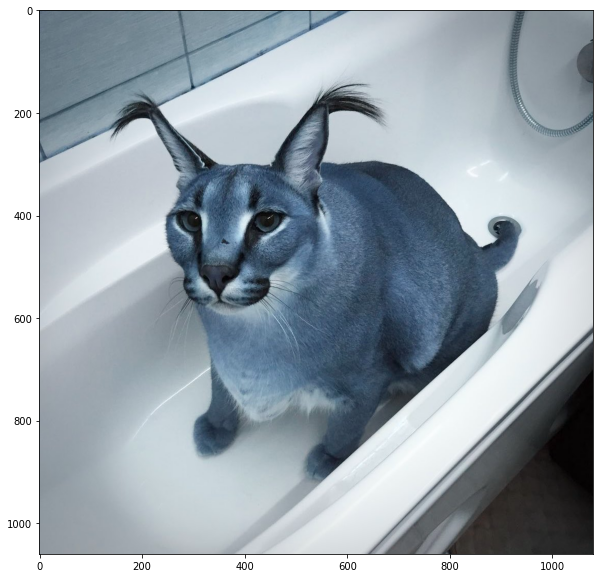

In [5]:
plt.figure(figsize=[10, 10])
plt.imshow(img)

Как видно, цвета изображения неправильные. Это потому, что функция imread считывает изображения в формате BGR (blue, green, red). Чтобы перейти к более привычному представлению RGB (reg, green, blue), который ожидает matplotlib, можно воспользоваться встроенной функцией cvtColor:

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

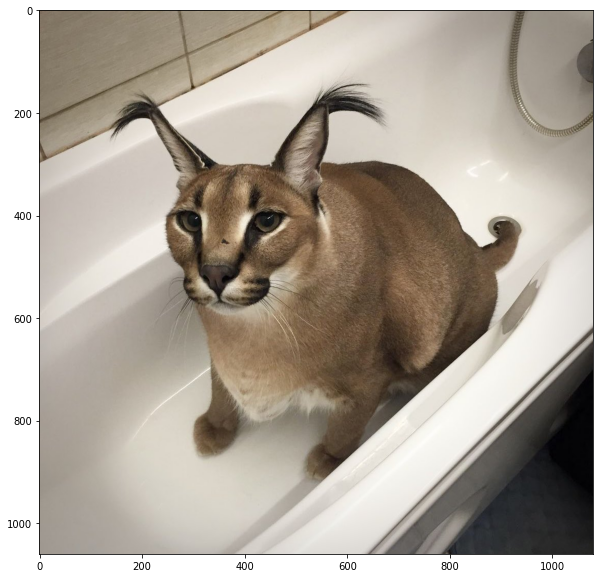

In [7]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

# Работа с изображением

Загруженное цветное изображение является обычным numpy массивом с тремя размерностями, каждый элемент которого - целое беззнаковое 8-ми битное число, представляющее квантованную на 256 уровней интенсивность одного из цветов (RGB: 0 - красный, 1 - зеленый, 2 - синий):

In [8]:
print('type(img_rgb) = ', type(img_rgb))
print('img_rgb.shape = ', img_rgb.shape)
print('img_rgb.dtype = ', img_rgb.dtype)

type(img_rgb) =  <class 'numpy.ndarray'>
img_rgb.shape =  (1060, 1080, 3)
img_rgb.dtype =  uint8


Над изображением можно выполнять те же операции, что и над обычным массивом. Например, рассчитать статистики:

In [9]:
print('img_rgb.min() = ', img_rgb.min())
print('img_rgb.max() = ', img_rgb.max())
print('img_rgb.mean() = ', img_rgb.mean())
print('img_rgb.std() = ', img_rgb.std())
print('np.median(img_rgb) = ', np.median(img_rgb))

img_rgb.min() =  0
img_rgb.max() =  255
img_rgb.mean() =  152.95307389937108
img_rgb.std() =  62.74586185757183
np.median(img_rgb) =  164.0


присвоить какое-либо значение блоку(пикселю):

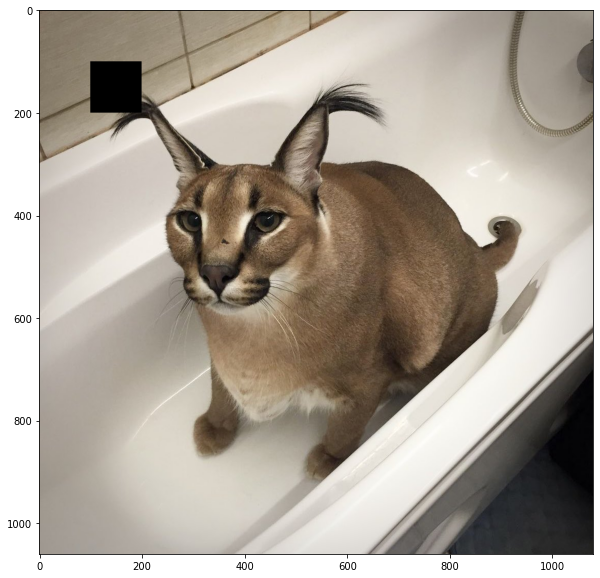

In [10]:
img_rgb_2 = img_rgb.copy()
img_rgb_2[100:200, 100:200] = 0

plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_2)

прибавить какое-либо значение блоку(пикселю):

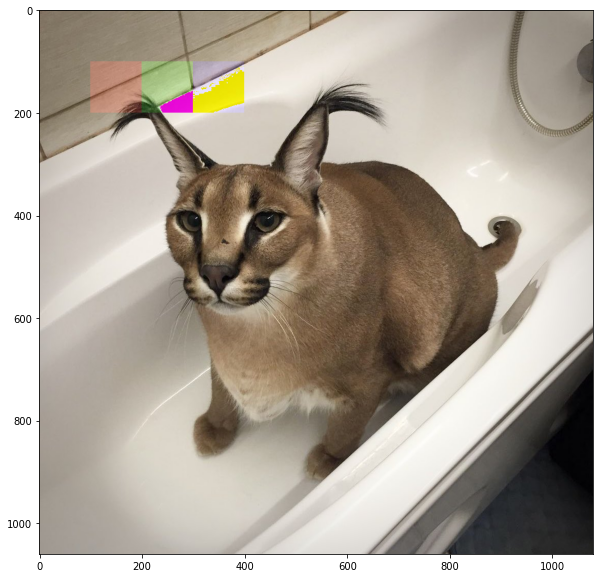

In [11]:
img_rgb_3 = img_rgb.copy()
img_rgb_3[100:200, 100:200, 0] += 40
img_rgb_3[100:200, 200:300, 1] += 40
img_rgb_3[100:200, 300:400, 2] += 40

plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_3)

## Вопрос 1

Что произошло с цветами на изображении img_rgb_2? Почему так произошло?

**Ответ:**

На img_rgb_2 мы занулили квадрат на изображении, что соответствует чёрному цвету, что мы и видим.

На img_rgb_3 мы добавили значение 40 к значениям квадрата, произошёл "сброс" из-за типа данных (uint8) путём взятия остатка (x + 40) % 256.

## Упражнение 1 BGR -> RGB
Реализуйте функцию преобразования изображения в формате BGR в формат RGB

In [18]:
def convert_color_bgr_to_rgb(img_bgr):
    # your code here
    return img_bgr[:, :, ::-1]

In [19]:
assert((img_rgb == convert_color_bgr_to_rgb(img)).all())

## Упражнение 2 Изменение яркости
Одним из простейших преобразований изображения является изменение уровня яркости, задаваемое следующим образом:
$$
f'(x, y) = \alpha f(x, y) + \beta
$$

В данном упражнении необходимо реализовать это преобразование, а также исследовать работу при различных значениях параметров. Какую физическую интерпретацию можно дать этому преобразованию?

In [29]:
def change_intensity(img, alpha=1, beta=0):
    # your code here
    img = img * alpha + beta
    img = np.clip(img, 0, 255)
    img = np.around(img)
    img = img.astype(np.uint8)
    return img

In [30]:
alpha = 1.2
beta = 10

img_out_cv = np.zeros_like(img_rgb)
cv2.convertScaleAbs(img_rgb, img_out_cv, alpha, beta)

img_out_my = change_intensity(img_rgb, alpha, beta)

assert((img_out_cv == img_out_my).all())

## Упражнение 3 Смешивание изображений $\alpha - blend$

Другим простым преобразованием является смешивание двух изображений, задаваемое как:

$$
    f'(x, y) = \alpha f_1(x, y) + (1 - \alpha) f_2(x, y)
$$

Реализуйте данную операцию и продеменстрируйте ее работу на примере. Изображения можно загрузить так же, как это сделано в начале тетрадки.

Приведите примеры, для каких задач может понадобиться данная операция. 

Как она может быть обобщена на большее количество изображений? Выпишите формулу.

In [46]:
def blend(img1, img2, alpha=0.5):
    img = img1 * alpha + img2 * (1 - alpha)
    img = np.around(img)
    img = img.astype(np.uint8)
    return img

In [35]:
!wget -q https://ic.pics.livejournal.com/imhotype/24051864/433166/433166_original.png

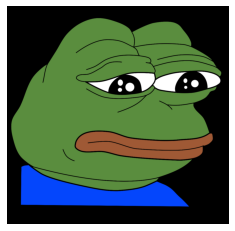

In [45]:
img2 = cv2.cvtColor(cv2.imread("433166_original.png"), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img_rgb.shape[1], img_rgb.shape[0]))
plt.imshow(img2)
plt.axis('off')
plt.show()

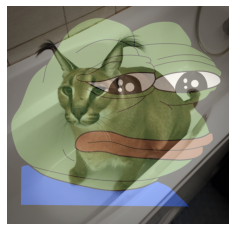

In [47]:
blended_img = blend(img_rgb, img2, alpha=0.6)
plt.imshow(blended_img)
plt.axis('off')
plt.show()

# Нанесение текста и фигур

С помощью OpenCV можно добавить дополнительные элементы на изображение, такие как текст, простые геометрические фигуры и т.д. (см. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [32]:
TEXT = 'Shlepa 0.99'
UL_CORNER = (250, 300)  # верхний левый угол
FONT = 0                # шрифт
SCALE = 3               # размер
COLOR = (255, 0, 0)     # цвет - красный
THICKNESS = 5           # толшина линий

img_rgb_4 = img_rgb.copy()

cv2.putText(img_rgb_4, TEXT, UL_CORNER, FONT, SCALE, COLOR, THICKNESS)
cv2.rectangle(img_rgb_4, UL_CORNER, (550, 600), COLOR, THICKNESS)
None

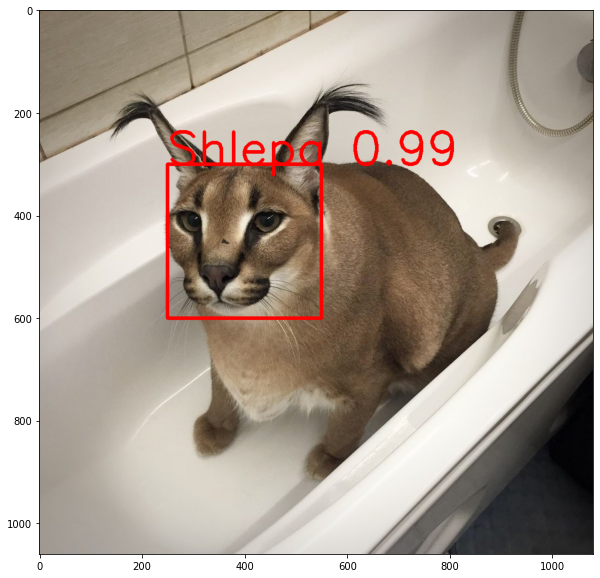

In [33]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb_4)

## Вопрос 2

Зачем может понадобиться рисовать на изображении?

**Ответ**:

- Начальник приказал
- Аугментация изображения для увеличения маленького датасета
- Восполнение недостатка таланта к рисованию руками
- Подписи для лучшего понимания происходящего на изображении

# Фильтр Байера

Сырые изображения, приходящие с камеры, являются байеризованными. Они представлены в виде двумерного массива, где отдельные пиксели кодируют интенсивность синего, зеленого, красного цветов. 

![Фильтр Байера](https://gadget-news.net/wp-content/uploads/2019/12/slide-16.jpg)

OpenCV позволяет преобразовывать такие изображения в привычные трехканальные изображения. Этот процесс называется дебайеризация или демозаикинг.


## Вопрос 3

Почему на фильтре Байера зеленых пикселей в 2 раза больше чем синих или красных? Можно ли сделать иначе?

**Ответ:**

Это сделано из-за более чувствительного восприятия глаза человека к зелёному цвету, чем к другим цветам.

Да, можно сделать и другугие фильтры (RGBE, RGBW, ..)

## Упражнение

Преобразуйте RGB изображение в байеризованное, как на картинке выше, разделив три канала на четыре смежных пикселя

In [48]:
def rgb_to_bayer(img_rgb):
    img_bayer = np.zeros((2 * img_rgb.shape[0], 2 * img_rgb.shape[1]))
    for i, row in enumerate(img_rgb):
      img_bayer[2*i, ::2] = row[:, 2]
      img_bayer[2*i, 1::2] = row[:, 1]
      img_bayer[2*i+1, ::2] = row[:, 1]
      img_bayer[2*i+1, 1::2] = row[:, 0]

    return img_bayer.astype(np.uint8)

посмотрим на кусочек изображения вблизи:

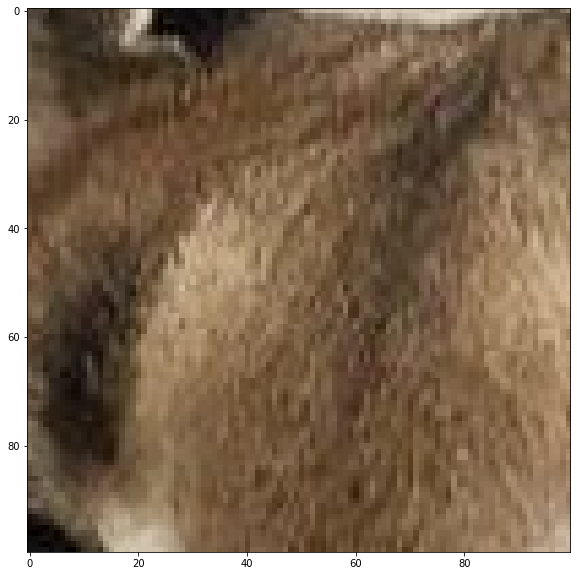

In [49]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb[300:400, 300:400])

Получим его байеризованную версию:

In [50]:
img_bayer = rgb_to_bayer(img_rgb)

Байеризованное изображение должно содержать характерный мазайчный узор:

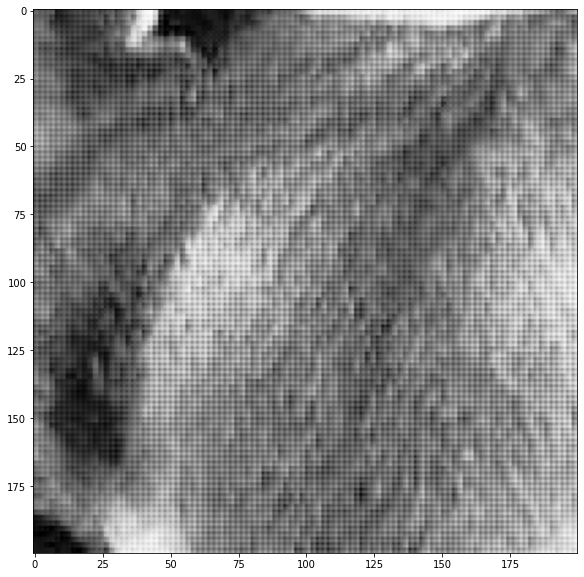

In [51]:
plt.figure(figsize=[10, 10])
plt.imshow(img_bayer[600:800, 600:800], cmap='Greys_r')

Для дебайеризации можно воспользоваться функцией из OpenCV:

In [52]:
img_debayer = cv2.cvtColor(img_bayer, cv2.COLOR_BAYER_RG2RGB)

Если все сделано верно, то дебайеризованное изображение будет похоже на исходное. Однако точного совпадения не будет. Попытайтесь предположить, почему?

**Ответ** Из-за интерполяции цветов

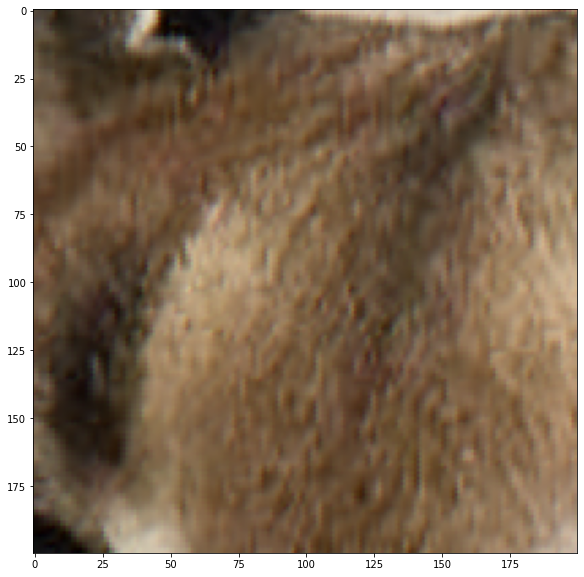

In [53]:
plt.figure(figsize=[10, 10])
plt.imshow(img_debayer[600:800, 600:800])

# Сжатие/расжатие изображений

Изображения в формате JPEG являются сжатыми изображениями и на диске могут занимать существенно меньше места, чем после загрузки в оперативную память. Чтобы загрузить изображения в сжатом формате, можно просто прочитать файл в бинарном режиме:

In [54]:
with open(IMG_PATH, 'rb') as f:
    img_bytes = f.read()

In [55]:
print('type(img_bytes) = ', type(img_bytes))

type(img_bytes) =  <class 'bytes'>


Считанные данные нужно преобразовать в массив байт для возможности дальнейшего расжатия:

In [56]:
img_buf = np.asarray(bytearray(img_bytes), dtype=np.uint8)

In [57]:
img_buf.shape, img_buf.dtype

((118931,), dtype('uint8'))

In [58]:
img_buf_size = np.array(img_buf.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_size / 1024 / 1024))

Размер сжатого изображения: 0.113 МБ


Как видим, в сжатом виде изображение занимает мало места и в оперативной памяти. Разожмем его с помощью средств OpenCV:

In [59]:
img = cv2.imdecode(img_buf, cv2.IMREAD_COLOR)

In [60]:
img.shape, img.dtype

((1060, 1080, 3), dtype('uint8'))

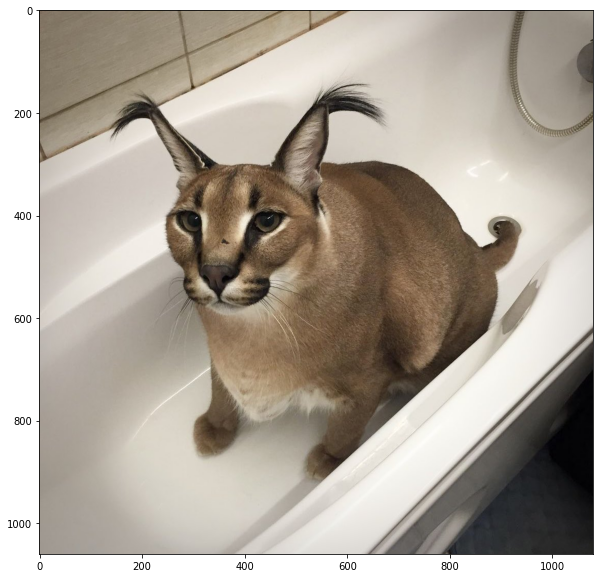

In [61]:
plt.figure(figsize=[10, 10])
plt.imshow(img[:, :, ::-1])

In [62]:
img_size = np.array(img.shape).prod()
print('Размер изображения: {:.3f} МБ'.format(img_size / 1024 / 1024))

Размер изображения: 3.275 МБ


Как видим в несжатом представлении изображение занимает существенно больше памяти. Рассчитаем коэффициент сжатия:

In [63]:
print('Коэффициент сжатия: {:.1f}'.format(img_size / img_buf_size))

Коэффициент сжатия: 28.9


Изображение можно сжать обратно следующим образом:

In [64]:
ok, img_buf_2 = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 10))

In [65]:
img_buf_2_size = np.array(img_buf_2.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_2_size / 1024 / 1024))

Размер сжатого изображения: 0.027 МБ


Алгоритм сжатия определяется указанным расширением, кроме того имеет различные параметры: https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_ImwriteFlags.html. Наиболее используемым является качество сжатия.

Декодируем сжатое с качеством 10 изображение:

In [66]:
img_2 = cv2.imdecode(img_buf_2, cv2.IMREAD_COLOR)

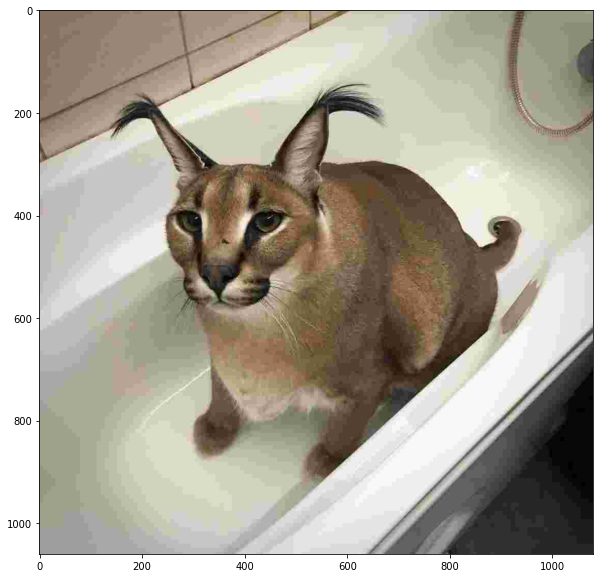

In [67]:
plt.figure(figsize=[10, 10])
plt.imshow(img_2[:, :, ::-1])

## Вопрос 4

Зачем может понадобиться хранить в оперативной памяти сжатые изображения?

- Малый объём ОЗУ
- 